# Clase 2 - Pandas

En la clase inicial realizamos una introducción general a python, donde aprendimos distintos tipos de objetos, creación de variables, funciones, operaciones, etc. En esta clase aprenderemos a utilizar el modulo Pandas, el cual consiste en una librería open-source que permite realizar manipulación y análisis de datos estructurados (tablas, dataframe).

Dentro de los conceptos que revisaremos durante este modulo serán:
 - Creación e importación de dataframes
 - Índices
 - Selección de variables y/o observaciones
 - Vista y operación de dataframes
 - Principales métodos de un dataframe
 - Métodos de agregación y merge

## Creación e importación de dataframes

Un dataframe o tabla se puede considerar la unidad base para realizar data science, dado que consiste en forma ordenada de presentar las observaciones correspondientes a distintas variables de interés. En este sentido, partiremos desde lo más esencial que es crear un dataframe desde cero para luego importar dataframes (que es típicamente lo que más hacemos!)

Primero que todo, importamos el módulo que nos permite hacer todo lo que hemos hablado hasta hora que es `pandas`!

In [1]:
#!pip install gcsfs

In [2]:
import pandas as pd

Para ver la descripción del módulo podemos utilizar el comando help(pd) y se desplegará un informativo del módulo. Para la documentación y otras consultas sobre el módulo, pueden visitar https://pandas.pydata.org

#### Creación

Ahora que tenemos importado nuestro módulo, podemos crear nuestro primer dataframe. Para ello utilizaremos los siguientes datos

| Nombre | Edad | Color de pelo | Hobby | Sexo |
| --- | --- | --- | --- | --- |
| Camila | 25 | Castaño | Deporte | F |
| Ernesto | 44 | Negro | Bailar | M |
| Bastian | 34 | Rubio | Bateria | M |
| Paz | 31 | Pelirrojo | Karate |

los cuales debemos guardar como un data frame utilizando pandas, lo que se realiza de la siguiente forma:

In [3]:
import numpy as np

In [4]:
first_dataset = pd.DataFrame({'Nombre' : ['Camila','Ernesto','Bastian','Paz'],
                              'Edad' : [25,44,34,31],
                              'Color de pelo' : ['Castaño','Negro','Rubio','Pelirrojo'],
                              'Hobby' : ['Deporte','Bailar','Bateria','Karate'], 
                              'Sexo': ['F', 'M', 'M', np.nan]})


In [5]:
first_dataset

,Nombre,Edad,Color de pelo,Hobby,Sexo
0,Camila,25,Castaño,Deporte,F
1,Ernesto,44,Negro,Bailar,M
2,Bastian,34,Rubio,Bateria,M
3,Paz,31,Pelirrojo,Karate,NaN


Observamos que la tabla creada es identica a la inicial con la diferencia que esta última posee una columna adicional con lo números del 0 al 3 la cual se denomina índice. Profundizaremos en ellos un poco más adelante.

#### Importación

En la gran mayoría (si es que no en todos) los proyectos de data science, los datos a utilizar provienen de una fuente externa (archivo, base de datos, etc) y en un gran volumen! por lo cual reconstruir dichos datos como los acabamos de imputar se vuelve imposible. Por esto, utilizaremos el módulo de pandas que trae funciones que nos permiten transformar archivos de datos en dataframes. En particular, veremos como traer datos desde un archivo, como CSV u otros formatos.

Cuando nuestros datos vienen en un archivo CSV, utilizamos la función **read_csv** para poder desde un archivo crear un dataframe

In [6]:
first_import = pd.read_csv('gs://diplomado-data-science-uc-python/python/02-Pandas/data/anime.csv',delimiter=';')

In [7]:
first_import.head(2)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


## Índices

Los índices en palabras simples es darle "nombres" a las observaciones o filas dentro de un dataframe. Muchas veces son útiles dado que podemos asignar como índice algún identificador de la observación, que típicamente no son variables de interés más allá de saber a quién corresponden los valores observados.

En `R` los índices son conocimos como **row names** y solamente admite índices simples, mientras que `pandas` admite índices multiples en sus dataframes

Tomando el mismo dataset que cargamos antes, podemos obtener su(s) índice(s) mediante el método **index**

In [8]:
first_import.index

RangeIndex(start=0, stop=10731, step=1)

Observamos que la primera variable es un indentificador llamado `anime_id` el cual es un candidato ideal para transformarse en índice, lo cual lo podemos hacer directamente en la carga de los datos utilizando el parámetro `index` o una vez cargado utilizando el método `set_index`

In [9]:
first_import.set_index('anime_id', inplace = True)
first_import.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Para utilizar multiples índices simplemente debemos pasarle una lista con el nombre de las columnas que queremos sean utilizadas como índices

In [10]:
first_import = pd.read_csv('gs://diplomado-data-science-uc-python/python/02-Pandas/data/anime.csv',delimiter=';',index_col=['anime_id','type'])
first_import.head()

,,name,genre,episodes,rating,members
anime_id,type,,,,,
32281,Movie,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
5114,TV,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665
28977,TV,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262
9253,TV,Steins;Gate,"Sci-Fi, Thriller",24,9.17,673572
9969,TV,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.16,151266


Un ejemplo importante de la utilización de índices es cuando contamos con fechas en nuestros datos (series de tiempo), como se muestra a continuación

In [11]:
fechas_index = pd.read_csv('gs://diplomado-data-science-uc-python/python/02-Pandas/data/SPfuture.csv',index_col = 'Date',parse_dates=True)
fechas_index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-11,2918.75,2926.50,2914.50,2916.50,2916.50,902330.0
2019-08-12,2918.75,2931.00,2872.50,2880.25,2880.25,1710875.0
2019-08-13,2882.25,2944.25,2866.75,2932.00,2932.00,2184012.0
2019-08-14,2931.00,2936.50,2835.75,2840.75,2840.75,2786308.0
2019-08-15,2836.00,2871.75,2817.75,2848.50,2848.50,2495340.0


## Selección de variables y/o observaciones

Solo a modo de unificar lenguaje, llamaremos variables a las columnas de un dataframe mientras que observaciones o registros se refiere a las filas del mismo. Cuando tenemos un dataframe, existen distintas formas de acceder a la información que éste contiene y en esta sección revisaremos dos métodos `iloc`y `loc`.
 - `iloc` es un método que permite seleccionar filas (o columnas) mediante su posición (recibe números enteros)
 - `loc` también permite seleccionar filas (o columnas) pero basado en índices (recibe etiquetas)

Ahora haremos algunas selecciones utilizando nuestro `first_import` dataframe para utilizar dichos métodos.

In [12]:
# seleccionar la variable name
# La form mas general
first_import.loc[:,'name']
# Mas específica
first_import['name']
# Super específica
first_import.name

anime_id  type 
32281     Movie                      Kimi no Na wa.
5114      TV       Fullmetal Alchemist: Brotherhood
28977     TV                               Gintama°
9253      TV                            Steins;Gate
9969      TV                          Gintama&#039;
                                 ...               
9600      OVA                        G-Taste (2010)
2592      OVA                                Kimera
730       OVA              Houkago no Shokuinshitsu
6546      OVA          Pico: My Little Summer Story
30663     ONA                        Docchi mo Maid
Name: name, Length: 10731, dtype: object

In [13]:
# seleccionar las variables name y episodes
first_import.loc[:,['name','episodes']]

#  seleccionar todas menos una
first_import.loc[:, first_import.columns != 'name']

# Cuando quiero descartar mas de 2 columnas drop es mas facil
first_import.drop(['name', 'genre', 'members'], axis='columns')

,,episodes,rating
anime_id,type,,
32281,Movie,1,9.37
5114,TV,64,9.26
28977,TV,51,9.25
9253,TV,24,9.17
9969,TV,51,9.16
...,...,...,...
9600,OVA,1,5.49
2592,OVA,1,5.29
730,OVA,2,5.23


In [14]:
# Seleccionar primeros 3 elementos usando loc
first_import.loc[[32281, 5114, 28977], :]

,,name,genre,episodes,rating,members
anime_id,type,,,,,
32281,Movie,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
5114,TV,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665
28977,TV,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262


In [15]:
# Seleccionar primeros 3 elementos usando iloc
first_import.iloc[0:3, :]

,,name,genre,episodes,rating,members
anime_id,type,,,,,
32281,Movie,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
5114,TV,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665
28977,TV,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262


In [16]:
# Seleccionar 2 columnas utilizando iloc
first_import.iloc[:,[0,2]]

,,name,episodes
anime_id,type,,
32281,Movie,Kimi no Na wa.,1
5114,TV,Fullmetal Alchemist: Brotherhood,64
28977,TV,Gintama°,51
9253,TV,Steins;Gate,24
9969,TV,Gintama&#039;,51
...,...,...,...
9600,OVA,G-Taste (2010),1
2592,OVA,Kimera,1
730,OVA,Houkago no Shokuinshitsu,2


In [17]:
# Para las mismas variables, sólo seleccionar las 10 primeras observaciones
first_import.iloc[0:10,[0,2]]

,,name,episodes
anime_id,type,,
32281,Movie,Kimi no Na wa.,1
5114,TV,Fullmetal Alchemist: Brotherhood,64
28977,TV,Gintama°,51
9253,TV,Steins;Gate,24
9969,TV,Gintama&#039;,51
32935,TV,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,10
11061,TV,Hunter x Hunter (2011),148
820,OVA,Ginga Eiyuu Densetsu,110
15335,Movie,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1


Otra forma de seleccionar variables y/o observaciones es utilizando los nombres de las variables, entregados como lista

In [18]:
first_import[['name','episodes']]

,,name,episodes
anime_id,type,,
32281,Movie,Kimi no Na wa.,1
5114,TV,Fullmetal Alchemist: Brotherhood,64
28977,TV,Gintama°,51
9253,TV,Steins;Gate,24
9969,TV,Gintama&#039;,51
...,...,...,...
9600,OVA,G-Taste (2010),1
2592,OVA,Kimera,1
730,OVA,Houkago no Shokuinshitsu,2


In [19]:
# Para acceder a las 10 primeras observaciones de las  2 variables previamente seleccionadas
first_import[['name','episodes']][0:10]

,,name,episodes
anime_id,type,,
32281,Movie,Kimi no Na wa.,1
5114,TV,Fullmetal Alchemist: Brotherhood,64
28977,TV,Gintama°,51
9253,TV,Steins;Gate,24
9969,TV,Gintama&#039;,51
32935,TV,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,10
11061,TV,Hunter x Hunter (2011),148
820,OVA,Ginga Eiyuu Densetsu,110
15335,Movie,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1


In [20]:
# En caso que el dataframe no se le haga nada al momento de importar, sus indices por defecto son números:
first_import = pd.read_csv('gs://diplomado-data-science-uc-python/python/02-Pandas/data/anime.csv',delimiter=';')
first_import.loc[0:9,['name','episodes', 'anime_id']]

,name,episodes,anime_id
0,Kimi no Na wa.,1,32281
1,Fullmetal Alchemist: Brotherhood,64,5114
2,Gintama°,51,28977
3,Steins;Gate,24,9253
4,Gintama&#039;,51,9969
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,10,32935
6,Hunter x Hunter (2011),148,11061
7,Ginga Eiyuu Densetsu,110,820
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1,15335
9,Gintama&#039;: Enchousen,13,15417


Otra forma de seleccionar es utilizando algun criterio, el cual genera una lista de `True`/`False`, seleccionando así aquellas observaciones que cumplan dicho criterio. Por ejemplo si en el dataset que hemos estado utilizando queremos seleccionar aquellos animes que han tenido 15 o menos episodios, tendriamos lo siguiente

In [21]:
criterio = first_import['episodes'] <= 15
criterio

0         True
1        False
2        False
3        False
4        False
         ...  
10726     True
10727     True
10728     True
10729     True
10730     True
Name: episodes, Length: 10731, dtype: bool

In [22]:
first_import[criterio]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
...,...,...,...,...,...,...,...
10726,9600,G-Taste (2010),"Ecchi, Yuri",OVA,1,5.49,1445
10727,2592,Kimera,"Action, Horror, Sci-Fi, Supernatural, Vampire,...",OVA,1,5.29,3374
10728,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550
10729,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551


In [23]:
criterio2 = first_import['type'] == 'TV'

first_import[criterio & criterio2]['rating'].mean()

# Operadores lógicos: &, | , ~, ==, != (y, o, no, igual, distinto)

6.908138440860207

El comando `query` nos permite escribir querys  para filtrar a gusto, dichas querys deben empezar y terminar con comillas dobles, y si se desean usar comillas en su interior, se deben usar simples:

In [24]:
first_import.query("episodes <= 15 & type == 'TV'")['rating'].mean()

6.908138440860207

Algunos métodos y formas de hacer selecciones u otras operaciones de interés para seleccionar (como ordenar por ejemplo) son las siguientes:

In [25]:
# Seleccionar valores unicos
first_import['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [26]:
#contar valores unicos
first_import['type'].nunique()

6

In [27]:
#podemos obtener una tabla con la cantidad de valores:
first_import['type'].value_counts()

TV         3568
Movie      2250
OVA        2176
Special    1646
ONA         604
Music       487
Name: type, dtype: int64

In [28]:
# Ordenar
first_import.sort_values('episodes',ascending = True)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
6832,5662,Suteneko Tora-chan,Music,Movie,1,5.88,615
6831,9667,Super Speed,Music,Music,1,5.88,691
6828,5492,Platonic Chain: Web,"Sci-Fi, Slice of Life",Special,1,5.88,322
6827,19237,Nimrod,"Fantasy, Music",Music,1,5.88,296
...,...,...,...,...,...,...,...
6537,8213,Hoka Hoka Kazoku,Comedy,TV,1428,6.05,194
5332,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471,6.48,406
9108,23349,Kirin Monoshiri Yakata,Kids,TV,1565,5.56,116
926,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,7.76,14233


In [29]:
# Seleccion por valor de variable
first_import[first_import['type'] == 'Movie']

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193
...,...,...,...,...,...,...,...
10665,30211,Zenchuu Maite,Dementia,Movie,1,4.27,73
10667,4790,Zeno: Kagirinaki Ai ni,"Drama, Historical",Movie,1,6.76,207
10679,11093,Ziggy: Soreyuke! R&amp;R Band,"Adventure, Music, Mystery",Movie,1,6.45,123
10688,11097,Zou no Inai Doubutsuen,Drama,Movie,1,6.07,85


## Operaciones en dataframes

Aquí miraremos algúnas operaciones básicas que se pueden realizar a sus columnas o creación nuevas!

In [30]:
first_import.head(1)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [31]:
# Transformación de columnas
first_import['rating10'] = first_import['rating']*10
first_import.head(1)

,anime_id,name,genre,type,episodes,rating,members,rating10
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,93.7


In [32]:
# Crear variable
first_import['ratio'] = first_import['episodes'] / first_import['episodes'].max()
first_import.head(1)

,anime_id,name,genre,type,episodes,rating,members,rating10,ratio
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,93.7,0.00055


In [33]:
# Convertir tipo de dato de una columna
first_import['rating_str'] = first_import['rating10'].astype(str)

In [34]:
first_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10731 non-null  int64  
 1   name        10731 non-null  object 
 2   genre       10731 non-null  object 
 3   type        10731 non-null  object 
 4   episodes    10731 non-null  int64  
 5   rating      10731 non-null  float64
 6   members     10731 non-null  int64  
 7   rating10    10731 non-null  float64
 8   ratio       10731 non-null  float64
 9   rating_str  10731 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 838.5+ KB


## Principales métodos en dataframes

En esta sección mostraremos algunos métodos de los objetos dataframes que serán de utilidad al momento de adquirir un nuevo set de datos, manipularlos y llevarlos a una forma que nos sea útil para cuando queramos modelar.

In [35]:
# Estadísticas descriptivas
import numpy as np
first_import.describe(include = np.number)

,anime_id,episodes,rating,members,rating10,ratio
count,10731.000000,10731.000000,10731.000000,1.073100e+04,10731.000000,10731.000000
mean,13843.734973,13.544311,6.517701,2.013059e+04,65.177011,0.007450
std,11244.204389,49.325582,1.040336,5.788347e+04,10.403355,0.027132
min,1.000000,1.000000,1.670000,1.200000e+01,16.700000,0.000550
25%,3326.500000,1.000000,5.920000,1.950000e+02,59.200000,0.000550
50%,10298.000000,2.000000,6.630000,1.501000e+03,66.300000,0.001100
75%,23956.000000,13.000000,7.250000,1.215450e+04,72.500000,0.007151
max,34519.000000,1818.000000,10.000000,1.013917e+06,100.000000,1.000000


In [36]:
# métodos específicos dentro de los descriptivos
print(first_import['rating'].mean())
print(first_import['rating'].std())
print(first_import['rating'].min())
print(first_import['rating'].quantile(q = 0.25))

6.517701053023942
1.0403355427315095
1.67
5.92


In [37]:
# Método apply
def multiplica_10(value):
    res = value * 10
    return res

first_import['rating'].apply(multiplica_10)

0        93.7
1        92.6
2        92.5
3        91.7
4        91.6
         ... 
10726    54.9
10727    52.9
10728    52.3
10729    52.1
10730    51.5
Name: rating, Length: 10731, dtype: float64

In [38]:
# o a través de map:
list(map(lambda x: x*10,first_import['rating']))[0:4]

[93.69999999999999, 92.6, 92.5, 91.7]

In [39]:
# podemos aplicar multiples apply
def multiplica_10(value):
    res = value * 10
    return res

def porcentaje(value):
    res = str(value) + ' %'
    return res

def multiplica_N(value, N):
    return value * N

def multiplica_rating_episodes(row):
    return row['rating'] * row['episodes']

In [40]:
# Apply con parametros extra
first_import['rating'].apply(multiplica_N, N=100)

0        937.0
1        926.0
2        925.0
3        917.0
4        916.0
         ...  
10726    549.0
10727    529.0
10728    523.0
10729    521.0
10730    515.0
Name: rating, Length: 10731, dtype: float64

In [41]:
# Apply encadenados
first_import['rating'].apply(multiplica_10).apply(porcentaje)

0         93.69999999999999 %
1                      92.6 %
2                      92.5 %
3                      91.7 %
4                      91.6 %
                 ...         
10726    54.900000000000006 %
10727                  52.9 %
10728    52.300000000000004 %
10729                  52.1 %
10730                  51.5 %
Name: rating, Length: 10731, dtype: object

In [42]:
# Lo mismo pero vectorizado
(first_import['rating'] * 10).astype(str) + ' %'

0         93.69999999999999 %
1                      92.6 %
2                      92.5 %
3                      91.7 %
4                      91.6 %
                 ...         
10726    54.900000000000006 %
10727                  52.9 %
10728    52.300000000000004 %
10729                  52.1 %
10730                  51.5 %
Name: rating, Length: 10731, dtype: object

In [43]:
# Apply sobre mas de una columna
first_import.apply(multiplica_rating_episodes, axis='columns')

0          9.37
1        592.64
2        471.75
3        220.08
4        467.16
          ...  
10726      5.49
10727      5.29
10728     10.46
10729      5.21
10730      5.15
Length: 10731, dtype: float64

### Tratamiento de duplicados y casos perdidos

In [44]:
# Duplicados
df = pd.DataFrame({
        'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
        'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
        'rating': [4, 4, 3.5, 15, 5]})

display(df)

df[~df.duplicated()]

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [45]:
df.sort_values('rating').drop_duplicates()

,brand,style,rating
2,Indomie,cup,3.5
0,Yum Yum,cup,4.0
4,Indomie,pack,5.0
3,Indomie,pack,15.0


In [46]:
df = df.drop_duplicates(subset='style')
df

,brand,style,rating
0,Yum Yum,cup,4.0
3,Indomie,pack,15.0


In [47]:
# Tratamiento de NAs
#importemos un set de animes que viene con valores perdidos:
anime_na = pd.read_csv('gs://diplomado-data-science-uc-python/python/02-Pandas/data/animeNA.csv',delimiter=';')
anime_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11153 non-null  int64  
 1   me        11152 non-null  object 
 2   genre     11091 non-null  object 
 3   type      11128 non-null  object 
 4   episodes  11153 non-null  object 
 5   rating    10931 non-null  float64
 6   members   11153 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 610.1+ KB


In [48]:
anime_na.tail(5)

,anime_id,me,genre,type,episodes,rating,members
11148,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550
11149,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551
11150,30663,Docchi mo Maid,"Action, Comedy, Ecchi, Yuri",O,1,5.15,223
11151,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459
11152,33654,Hitorijime My Hero,Yaoi,NaN,Unknown,NaN,1574


In [49]:
anime_na.isna()

,anime_id,me,genre,type,episodes,rating,members
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11148,False,False,False,False,False,False,False
11149,False,False,False,False,False,False,False
11150,False,False,False,False,False,False,False
11151,False,False,False,True,False,True,False


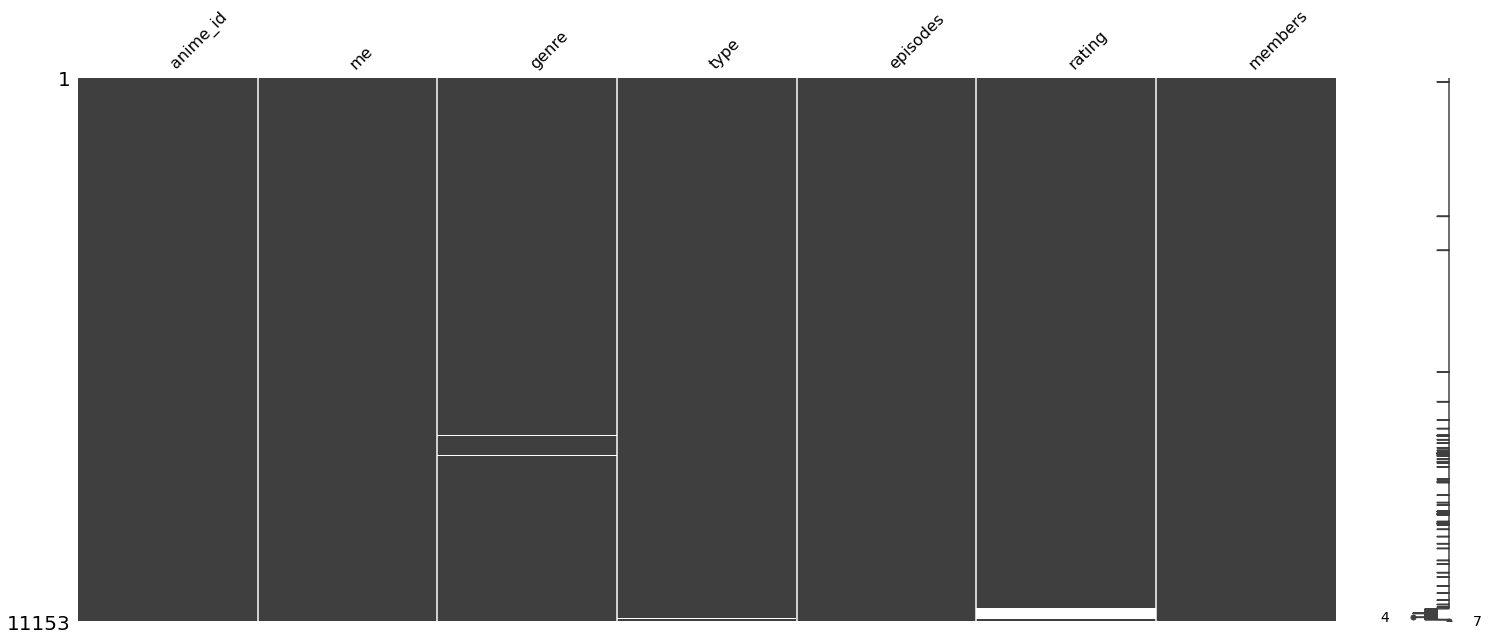

In [50]:
#veamos visualmente los na's
import missingno as msngo
msngo.matrix(anime_na);

In [51]:
#si queremos eliminar toda fila que tenga al menos un NA en alguna de sus columnas:
anime_na = anime_na.dropna()
anime_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 11150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10883 non-null  int64  
 1   me        10883 non-null  object 
 2   genre     10883 non-null  object 
 3   type      10883 non-null  object 
 4   episodes  10883 non-null  object 
 5   rating    10883 non-null  float64
 6   members   10883 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 680.2+ KB


In [52]:
# Cambio de tipo de variable
anime_na['episodes'][anime_na['episodes'] == 'Unknown'] = None # np.nan
anime_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 11150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10883 non-null  int64  
 1   me        10883 non-null  object 
 2   genre     10883 non-null  object 
 3   type      10883 non-null  object 
 4   episodes  10730 non-null  object 
 5   rating    10883 non-null  float64
 6   members   10883 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 680.2+ KB


In [53]:
anime_na = anime_na.dropna()
anime_na.info()
anime_na['episodes'] = anime_na['episodes'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 11150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10730 non-null  int64  
 1   me        10730 non-null  object 
 2   genre     10730 non-null  object 
 3   type      10730 non-null  object 
 4   episodes  10730 non-null  object 
 5   rating    10730 non-null  float64
 6   members   10730 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 670.6+ KB


## Group by, funciones de agregación y merge

En esta sección revisaremos como utilizar y combinar las funciones de agrupamiento y agregación en pandas. Estas funciones--haciendo el análogo con `R`--son equivalentes a group_by y summarise de `dplyr`.
Además también revisaremos el método de merge con el que podremos realizar join entre dos datasets.

In [54]:
anime_na.head(5)

,anime_id,me,genre,type,episodes,rating,members
0,32281,Kimi no wa.,"Drama, Romance, School, Supertural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Lo primero antes de generar agregaciones es crear un objeto agrupado, utilizando el método `groupby`. Para ejemplificar utilizaremos el mismo dataset que hemos esta usando y agruparemos por tipo (columna llamada type) de programa

In [55]:
data_agrupada = anime_na.groupby('type')
data_agrupada

Notemos que la data está agrupada en la memoria pero no se ha solicitado ningun calculo de agregación con este grupo, por lo tanto no es posible visualizar nada

sobre el objeto anterior podemos acceder a los datos para un cierto nivel de agregación, utilizando los índices

Una vez que tenemos los datos agrupados podemos realizar agregaciones a cada uno de los grupos que se formaron cuando aplicamos el método `groupby`, mediante el método `agg` al cual debemos pasarle una lista con las funciones que se desea agregar así como también si queremos agregar por índices o columnas (por default, es por índices).

Para ejemplificar haremos algunas agregaciones sobre el dataset anterior

In [56]:
data_agrupada.agg('count')

,anime_id,me,genre,episodes,rating,members
type,,,,,,
Movie,2250,2250,2250,2250,2250,2250
Music,487,487,487,487,487,487
O,604,604,604,604,604,604
OVA,2176,2176,2176,2176,2176,2176
Special,1646,1646,1646,1646,1646,1646
TV,3567,3567,3567,3567,3567,3567


Ahora que solicitamos un método de agregación (en este caso contar registros), si nos muestra algún resultado. Podemos solicitar más de un tipo de método a la vez:

In [57]:
# Promedio y desviación estándar del rating
anime_na.groupby('type').agg(['mean','std'])

anime_id                 episodes               rating            \
                 mean           std       mean        std      mean       std   
type                                                                            
Movie    14284.603111  10903.690040   1.099556   2.179138  6.337387  1.204693   
Music    22423.652977  10215.398341   1.131417   1.293852  5.588665  0.959398   
O        22656.246689  10363.622071   6.912252  11.453153  5.639801  1.127262   
OVA      11832.946691  10600.886701   2.539062   3.746734  6.472399  0.912209   
Special  16583.253949  10822.753475   2.582625   3.723764  6.528469  0.887297   
TV       10868.142977  10598.310002  35.974488  80.754953  6.929033  0.830447   

              members                
                 mean           std  
type                                 
Movie    10599.660444  31444.464974  
Music     1314.455852   4552.445070  
O         4455.402318  12897.328851  
OVA       7708.577206  18124.607781  
Special   7780.909478  15665.544512  
TV       44592.785254  90522.042970

Se cree que un animé es extenso si tiene al menos 15 episodios, creemos dicha variable:

In [58]:
# Creamos una nueva variable de popularidad
def extension(value):
    if value <= 15:
        res = 'No extenso'
    else:
        res = 'extenso'
    return res

anime_na['duracion'] = anime_na['episodes'].apply(extension)
anime_na.head()

#Lo mismo lo podríamos haber hecho con np.where()

,anime_id,me,genre,type,episodes,rating,members,duracion
0,32281,Kimi no wa.,"Drama, Romance, School, Supertural",Movie,1,9.37,200630,No extenso
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,extenso
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,extenso
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,extenso
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,extenso


In [59]:
#Veamos la información del primer cuantil
def Q1(data):
    return np.percentile(data, 25)

In [60]:
# Ahora agruparemos por tipo y popularidad
anime_na.groupby(['type','duracion']).agg(['mean','min','max','count', Q1])[['rating','episodes']]

rating                               episodes       \
                        mean   min    max count      Q1        mean  min   
type    duracion                                                           
Movie   No extenso  6.337092  2.49  10.00  2249  5.4500    1.055580    1   
        extenso     7.000000  7.00   7.00     1  7.0000  100.000000  100   
Music   No extenso  5.584444  3.28   8.38   486  5.0100    1.084362    1   
        extenso     7.640000  7.64   7.64     1  7.6400   24.000000   24   
O       No extenso  5.528564  2.67   8.26   543  4.7900    3.856354    1   
        extenso     6.630000  3.98   8.00    61  6.2100   34.114754   16   
OVA     No extenso  6.468287  2.00   9.25  2160  5.9000    2.349074    1   
        extenso     7.027500  4.67   9.11    16  5.9225   28.187500   16   
Special No extenso  6.525329  1.67   8.66  1627  6.0900    2.307929    1   
        extenso     6.797368  4.38   7.71    19  6.7050   26.105263   16   
TV      No extenso  6.908138  3.00   9.15  1488  6.4275   11.911290    2   
        extenso     6.943987  3.00   9.26  2079  6.4900   53.197210   16   

                                       
                     max count     Q1  
type    duracion                       
Movie   No extenso    14  2249    1.0  
        extenso      100     1  100.0  
Music   No extenso    14   486    1.0  
        extenso       24     1   24.0  
O       No extenso    15   543    1.0  
        extenso       84    61   24.0  
OVA     No extenso    15  2160    1.0  
        extenso      110    16   18.0  
Special No extenso    15  1627    1.0  
        extenso       51    19   17.5  
TV      No extenso    15  1488   12.0  
        extenso     1818  2079   26.0

Con lo anterior tenemos alguna idea de como se utiliza el `groupby` y `agg` en `python`. Ahora veremos un ejemplo de la utilización del la función `merge` que se utiliza para unir las variables en dos dataframes que tienen ciertas variables en común (key), para así poder consolidar todas las variables en un solo dataset

In [61]:
df1 = pd.DataFrame({'Nombre': ['Juan', 'Jorge', 'Lisa', 'Susana'],
                    'Profesion': ['Contador', 'Ingeniero', 'Ingeniero', 'Psicologo']})
df2 = pd.DataFrame({'Nombre': ['Lisa', 'Juan', 'Jorge', 'Susana'],
                    'Contratacion': [2004, 2008, 2012, 2014]})
display(df1)
display(df2)

,Nombre,Profesion
0,Juan,Contador
1,Jorge,Ingeniero
2,Lisa,Ingeniero
3,Susana,Psicologo


,Nombre,Contratacion
0,Lisa,2004
1,Juan,2008
2,Jorge,2012
3,Susana,2014


In [62]:
df3 = pd.merge(df1,df2) #se puede usar el parametro 'on' para especificar la(s) variable(s) del join
display(df3)

,Nombre,Profesion,Contratacion
0,Juan,Contador,2008
1,Jorge,Ingeniero,2012
2,Lisa,Ingeniero,2004
3,Susana,Psicologo,2014


In [63]:
#En caso que la columna mediante la que haremos el join no tiene el mismo nombre, tendremos lo siguiente
df2 = pd.DataFrame({'Empleado': ['Lisa', 'Juan', 'Jorge', 'Susana'],
                    'Contratacion': [2004, 2008, 2012, 2014]})
display(df2)
df3 = pd.merge(df1,df2, left_on='Nombre',right_on='Empleado')#.drop('Empleado', axis = 1)
display(df3)

,Empleado,Contratacion
0,Lisa,2004
1,Juan,2008
2,Jorge,2012
3,Susana,2014


,Nombre,Profesion,Empleado,Contratacion
0,Juan,Contador,Juan,2008
1,Jorge,Ingeniero,Jorge,2012
2,Lisa,Ingeniero,Lisa,2004
3,Susana,Psicologo,Susana,2014


Los merge también se pueden realizar utilizando índices en vez de columnas!

En el caso anterior, las personas mencionadas en ambos dataset son las mismas por lo que el match es obvio. En caso que no se de lo anterior, debemos escoger el tipo de join de deseamos hacer: left, right, inner u outer

In [64]:
df1 = pd.DataFrame({'Nombre': ['Federico', 'Jorge', 'Lisa', 'Susana'],
                    'Profesion': ['Contador', 'Ingeniero', 'Ingeniero', 'Psicologo']})
df2 = pd.DataFrame({'Nombre': ['Lisa', 'Pedro', 'Jorge', 'Susana'],
                    'Contratacion': [2004, 2008, 2012, 2014]})
print('df1')
display(df1)
print('df2')
display(df2)

df1


,Nombre,Profesion
0,Federico,Contador
1,Jorge,Ingeniero
2,Lisa,Ingeniero
3,Susana,Psicologo


df2


,Nombre,Contratacion
0,Lisa,2004
1,Pedro,2008
2,Jorge,2012
3,Susana,2014


In [65]:
pd.merge(df1,df2)
# por defecto realiza un inner join

,Nombre,Profesion,Contratacion
0,Jorge,Ingeniero,2012
1,Lisa,Ingeniero,2004
2,Susana,Psicologo,2014


In [66]:
df3 = pd.merge(df1,df2,how = 'left')
df4 = pd.merge(df1,df2,how = 'right')
df5 = pd.merge(df1,df2,how = 'outer')

display(df3)
display(df4)
display(df5)

,Nombre,Profesion,Contratacion
0,Federico,Contador,NaN
1,Jorge,Ingeniero,2012.0
2,Lisa,Ingeniero,2004.0
3,Susana,Psicologo,2014.0


,Nombre,Profesion,Contratacion
0,Jorge,Ingeniero,2012
1,Lisa,Ingeniero,2004
2,Susana,Psicologo,2014
3,Pedro,NaN,2008


,Nombre,Profesion,Contratacion
0,Federico,Contador,NaN
1,Jorge,Ingeniero,2012.0
2,Lisa,Ingeniero,2004.0
3,Susana,Psicologo,2014.0
4,Pedro,NaN,2008.0


In [67]:
# Al hacer join podemos encontrar columnas con el mismo nombre en ambos dataframe
temp_max = pd.DataFrame({'Ciudad': ['Santiago', 'Talca', 'Concepcion', 'Arica'],
                    'Temperatura': [20,16,15,26],
                    'x': [1, 2, 3, 4]})
temp_min = pd.DataFrame({'Ciudad': ['Santiago', 'Talca', 'Concepcion', 'Arica'],
                    'Temperatura': [12, 8, 2, 20],
                    'y': [2, 3, 4, 5]})
display(temp_max)
display(temp_min)
temp = pd.merge(temp_max,temp_min, on = 'Ciudad')
display(temp)

,Ciudad,Temperatura,x
0,Santiago,20,1
1,Talca,16,2
2,Concepcion,15,3
3,Arica,26,4


,Ciudad,Temperatura,y
0,Santiago,12,2
1,Talca,8,3
2,Concepcion,2,4
3,Arica,20,5


,Ciudad,Temperatura_x,x,Temperatura_y,y
0,Santiago,20,1,12,2
1,Talca,16,2,8,3
2,Concepcion,15,3,2,4
3,Arica,26,4,20,5


In [68]:
temp = pd.merge(temp_max,temp_min,on = 'Ciudad', suffixes=['_maxima','_minima'])
display(temp)

,Ciudad,Temperatura_maxima,x,Temperatura_minima,y
0,Santiago,20,1,12,2
1,Talca,16,2,8,3
2,Concepcion,15,3,2,4
3,Arica,26,4,20,5


Pandas también tiene el comando join, que funciona por defecto como un left join en base a indices

In [69]:
display(temp_max)
display(temp_min)
display(temp_max.join(temp_min, lsuffix='Ciudad', rsuffix='Ciudad'))

,Ciudad,Temperatura,x
0,Santiago,20,1
1,Talca,16,2
2,Concepcion,15,3
3,Arica,26,4


,Ciudad,Temperatura,y
0,Santiago,12,2
1,Talca,8,3
2,Concepcion,2,4
3,Arica,20,5


,CiudadCiudad,TemperaturaCiudad,x,CiudadCiudad,TemperaturaCiudad,y
0,Santiago,20,1,Santiago,12,2
1,Talca,16,2,Talca,8,3
2,Concepcion,15,3,Concepcion,2,4
3,Arica,26,4,Arica,20,5


Finalmente el comando concat ayuda concatenar columnas entre Data frames, también por índice:

In [70]:
display(temp_max)
display(temp_min)
display(pd.concat([temp_max,temp_min], axis=1))

,Ciudad,Temperatura,x
0,Santiago,20,1
1,Talca,16,2
2,Concepcion,15,3
3,Arica,26,4


,Ciudad,Temperatura,y
0,Santiago,12,2
1,Talca,8,3
2,Concepcion,2,4
3,Arica,20,5


,Ciudad,Temperatura,x,Ciudad,Temperatura,y
0,Santiago,20,1,Santiago,12,2
1,Talca,16,2,Talca,8,3
2,Concepcion,15,3,Concepcion,2,4
3,Arica,26,4,Arica,20,5


# Ejercicios

En la carpeta data encontrará 3 archivos csv con los siguientes nombres:

```
gs://diplomado-data-science-uc-python/python/02-Pandas/data/state-abbrevs.csv
gs://diplomado-data-science-uc-python/python/02-Pandas/data/state-area.csv
gs://diplomado-data-science-uc-python/python/02-Pandas/data/state-population.csv
```

 - state-population.csv
 - state-area.csv
 - state-abbrevs.csv
 
Con estos archivos realice los siguientes ejercicios:
 - 1) Cargue los tres datasets utilizando la función `read_csv` de pandas
 - 2) Revise los datos cargados y realice las modificaciones necesarias para empezar a trabajar
 - 3) Elimine las columnas que no aportan información
 - 4) Agrupe por state/region y ages, para luego agregar usando promedio, minimo, máximo y contar
 - 5) Forme un nuevo dataset llamado df que tenga la información de los 3 sets importados. Use las llaves necesarias.
 - 6) Calcule la población por area para cada estado. Para esto agrupe por state/region y calcule el promedio de la población. Guarde dicha información en un data frame con las columnas 'state' y 'pop/area' (hint: puede extraer los valores de un objeto groupby, finalizando su sentencia con .values, o extraer sus etiquetas con .index)
 - 7) Finalmente, cree un dataframe que posea: El estado, el área, la población, la población por área y como índice  la abreviación del nombre del estado.
 
 ## Próxima clase
Haremos gráficos! 